# CO2 Enthalpy of Adsorption Characterization
Daniel O'Nolan
2022-08-17

In [1]:
%matplotlib qt
import pygaps
import pygaps.characterisation as pgc
import pygaps.parsing as pgp
import pygaps.modelling as pgm
import pygaps.graphing as pgg
import pandas as pd

## Data Import

In [2]:
## ASAP DATA

ASAP_WO2F4_273K = pygaps.PointIsotherm(
    pressure=[0.00009506147492,0.00019047358752,0.00038104716677,0.00063433822804,0.00103396252576,0.00130695062541,
              0.00164656255083,0.00195916737550,0.00268717252707,0.00316812210191,0.00439142230909,0.00515668438076,
              0.00693681988956,0.01133765475387,0.01349272460143,0.02021340235874,0.02663210907898,0.03345646759868,
              0.05338289634724,0.08650846330037,0.13322163234506,0.20049152336740,0.26719102687511],
              
    loading=[0.86395110198983,1.15003123048095,1.35758454537343,1.46745783885072,1.53260462211118,1.55877576514678,
             1.58136878736504,1.59637726420987,1.61727937895958,1.62754082270010,1.64259391451771,1.64922816097082,
             1.65304274114393,1.66273757473008,1.66659676987597,1.67302132595699,1.67790220397966,1.68135094137593,
             1.68644597126796,1.69231730168645,1.69889801017221,1.70724547158026,1.71517801374141],
      
    m='WO2F4-1-Ni',
    a='carbon dioxide',
    t='273',
    pressure_mode = 'absolute',
    pressure_unit = 'bar',
    material_basis = 'mass',
    material_unit = 'g',
    loading_basis = 'molar',
    loading_unit = 'mmol',
    temperature_unit = 'K'
)

ASAP_WO2F4_283K = pygaps.PointIsotherm(
    pressure=[0.00009548943954,0.00019031893363,0.00038003658364,0.00063330364690,0.00102906693047,0.00130864115233,
              0.00161736629772,0.00195268257824,0.00261579442766,0.00317215776829,0.00444770032344,0.00566874205066,
              0.00680136975343,0.01158393439476,0.01339998693441,0.02045116670355,0.03053198668910,0.03832553442249,
              0.05334192906720,0.08717875722274,0.13362944663241,0.20055898179084,0.26618748850095],
    
    loading=[0.63260016061390,0.94946015882930,1.21358079771571,1.36441955920407,1.45774962077273,1.49802801820291,
             1.52873204247345,1.55163736950120,1.58025341304542,1.59829124654234,1.62086196127420,1.63467029535112,
             1.63831980012492,1.65187829035424,1.65665655393950,1.66353618274293,1.67042027304363,1.67386454894263,
             1.67864727402516,1.68524582850004,1.69344159900062,1.70381458017311,1.71413848487552],

    m='WO2F4-1-Ni',
    a='carbon dioxide',
    t='283',
    pressure_mode = 'absolute',
    pressure_unit = 'bar',
    material_basis = 'mass',
    material_unit = 'g',
    loading_basis = 'molar',
    loading_unit = 'mmol',
    temperature_unit = 'K'
)

ASAP_WO2F4_298K = pygaps.PointIsotherm(
    pressure=[0.00009574541838,0.00019123752436,0.00050229047732,0.00070420978532,0.00102161021356,0.00127702509926,
              0.00215412325914,0.00254474696758,0.00351988368961,0.00440656639051,0.00536538446155,0.00671948318939,
              0.01064964762913,0.01327052163688,0.02075614549197,0.03018772314822,0.03815348731172,0.05334290631974,
              0.08696374833014,0.13359123112489,0.19956685580659,0.26628645898606,0.33373386600041]
   ,
    loading=[0.3621486570893,0.6577719282591,0.9344115285090,1.0751226911752,1.2040733470153,1.3072767020612,
             1.4157000089230,1.4531052021058,1.5030873561167,1.5368162755421,1.5596011421433,1.5741813152494,
             1.6069242437762,1.6244757740698,1.6445480503257,1.6577808512537,1.6646470955653,1.6714330329259,
             1.6794503435353,1.6861515124476,1.6942268225216,1.7015793700366,1.7090077630053],

    m='WO2F4-1-Ni',
    a='carbon dioxide',
    t='298',
    pressure_mode = 'absolute',
    pressure_unit = 'bar',
    material_basis = 'mass',
    material_unit = 'g',
    loading_basis = 'molar',
    loading_unit = 'mmol',
    temperature_unit = 'K'
)

##IGA DATA

IGA_WO2F4_293K = pygaps.PointIsotherm(
    pressure=[.007020,.014061,.021529,.029112,.036114,.043448], #p/p0        
    loading=[.0225,.0669,.1184,.1662,.2036,.2519], #mmol/g      
    m='WO2F4-1-Ni', 
    a='carbon dioxide', 
    t='293', 
    pressure_mode='relative'
)

IGA_WO2F4_298K = pygaps.PointIsotherm(
    pressure=[.006961,.014461,.021878,.029191,.036709,.044195], #p/p0
    loading=[.0187,.0474,.0790,.1120,.1432,.1805], #mmol/g       
    m='WO2F4-1-Ni', 
    a='carbon dioxide', 
    t='298', 
    pressure_mode='relative'
)

IGA_WO2F4_303K = pygaps.PointIsotherm(
    pressure=[.007010,.014299,.021496,.029234,.036310,.043795], #p/p0
    loading=[.0049,.0170,.0343,.0572,.0791,.1026], #mmol/g  
    m='WO2F4-1-Ni', 
    a='carbon dioxide', 
    t='303', 
    pressure_mode='relative'
)

## ASAP Data Analysis

In [8]:
print('ASAP @ 273 K')
ASAP_model_273K = pgm.model_iso(ASAP_WO2F4_273K, model='DSLangmuir',verbose=True)
print(ASAP_model_273K.model)

print('ASAP @ 283 K')
ASAP_model_283K = pgm.model_iso(ASAP_WO2F4_283K, model='DSLangmuir',verbose=True)
print(ASAP_model_283K.model)

print('ASAP @ 298 K')
ASAP_model_298K = pgm.model_iso(ASAP_WO2F4_298K, model='DSLangmuir',verbose=True)
print(ASAP_model_298K.model)

ASAP @ 273 K
Attempting to model using DSLangmuir.
Model DSLangmuir success, RMSE is 0.0039
DSLangmuir isotherm model.
RMSE = 0.003904
Model parameters:
	n_m1 = 0.05856
	K1 = 10.6
	n_m2 = 1.669
	K2 = 1.14e+04
Model applicable range:
	Pressure range: 9.51e-05 - 0.267
	Loading range: 0.864 - 1.72

ASAP @ 283 K
Attempting to model using DSLangmuir.
Model DSLangmuir success, RMSE is 0.00571
DSLangmuir isotherm model.
RMSE = 0.005705
Model parameters:
	n_m1 = 0.3129
	K1 = 0.5801
	n_m2 = 1.673
	K2 = 6718
Model applicable range:
	Pressure range: 9.55e-05 - 0.266
	Loading range: 0.633 - 1.71

ASAP @ 298 K
Attempting to model using DSLangmuir.
Model DSLangmuir success, RMSE is 0.0126
DSLangmuir isotherm model.
RMSE = 0.01256
Model parameters:
	n_m1 = 0.7787
	K1 = 1276
	n_m2 = 0.9119
	K2 = 5278
Model applicable range:
	Pressure range: 9.57e-05 - 0.334
	Loading range: 0.362 - 1.71



In [4]:
ASAP_models_isosteric = [ASAP_model_273K,ASAP_model_283K,ASAP_model_298K]
ASAP_result_dict = pgc.isosteric_enthalpy(ASAP_models_isosteric, verbose=True)

In [5]:
ASAP_Results = pd.DataFrame(ASAP_result_dict)
ASAP_Results

,loading,isosteric_enthalpy,slopes,correlation,std_errs
0,0.876522,38.110427,-4583.630814,-0.998519,2.076489
1,0.892743,38.237018,-4598.856152,-0.998440,2.138054
2,0.908964,38.363214,-4614.034058,-0.998360,2.199565
3,0.925185,38.488930,-4629.154276,-0.998279,2.260991
4,0.941405,38.614078,-4644.206074,-0.998196,2.322300
5,0.957626,38.738563,-4659.178214,-0.998113,2.383458
6,0.973847,38.862288,-4674.058903,-0.998028,2.444431
7,0.990067,38.985150,-4688.835746,-0.997942,2.505184
8,1.006288,39.107039,-4703.495684,-0.997855,2.565678
9,1.022509,39.227842,-4718.024928,-0.997767,2.625874


In [6]:
pgg.plot_iso(
    [ASAP_WO2F4_273K,ASAP_WO2F4_283K,ASAP_WO2F4_298K],
    lgd_keys=['adsorbate', 'temperature'],
    logx=True,
)

<AxesSubplot:xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

## IGA Data Analysis

In [7]:
print('IGA @ 283 K')
IGA_model_283K = pgm.model_iso(IGA_WO2F4_293K, model='Henry',verbose=True)
print(IGA_model_283K.model)

print('IGA @ 293 K')
IGA_model_293K = pgm.model_iso(IGA_WO2F4_298K, model='Henry',verbose=True)
print(IGA_model_293K.model)

print('IGA @ 303 K')
IGA_model_303K = pgm.model_iso(IGA_WO2F4_303K, model='Henry',verbose=True)
print(IGA_model_303K.model)

IGA @ 283 K
Attempting to model using Henry.
Model Henry success, RMSE is 0.04
Henry isotherm model.
RMSE = 0.04004
Model parameters:
	K = 5.639
Model applicable range:
	Pressure range: 0.00702 - 0.0434
	Loading range: 0.0225 - 0.252

IGA @ 293 K
Attempting to model using Henry.
Model Henry success, RMSE is 0.0408
Henry isotherm model.
RMSE = 0.04083
Model parameters:
	K = 3.896
Model applicable range:
	Pressure range: 0.00696 - 0.0442
	Loading range: 0.0187 - 0.18

IGA @ 303 K
Attempting to model using Henry.
Model Henry success, RMSE is 0.0955
Henry isotherm model.
RMSE = 0.09547
Model parameters:
	K = 2.091
Model applicable range:
	Pressure range: 0.00701 - 0.0438
	Loading range: 0.0049 - 0.103



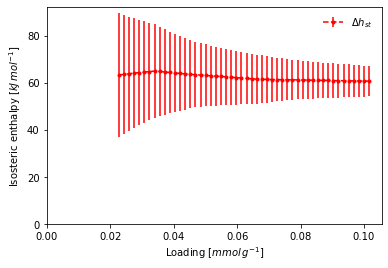

In [8]:
IGA_data_isosteric = [IGA_WO2F4_293K,IGA_WO2F4_298K,IGA_WO2F4_303K]
IGA_result_dict = pgc.isosteric_enthalpy(IGA_data_isosteric, verbose=True)

In [9]:
IGA_Results = pd.DataFrame(IGA_result_dict)
IGA_Results

,loading,isosteric_enthalpy,slopes,correlation,std_errs
0,0.022725,63.255560,-7607.895197,-0.922651,-26.438531
1,0.024334,63.548783,-7643.161834,-0.929215,-25.272707
2,0.025943,63.821087,-7675.912442,-0.935020,-24.203420
3,0.027552,64.074637,-7706.407524,-0.940174,-23.219073
4,0.029162,64.311310,-7734.872746,-0.944767,-22.309865
5,0.030771,64.532740,-7761.504586,-0.948875,-21.467458
6,0.032380,64.740355,-7786.474912,-0.952562,-20.684708
7,0.033989,64.935410,-7809.934727,-0.955881,-19.955462
8,0.035598,64.780479,-7791.300736,-0.959279,-19.074537
9,0.037207,64.554370,-7764.106167,-0.962474,-18.201303


<AxesSubplot:xlabel='Pressure [$p/p^0$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

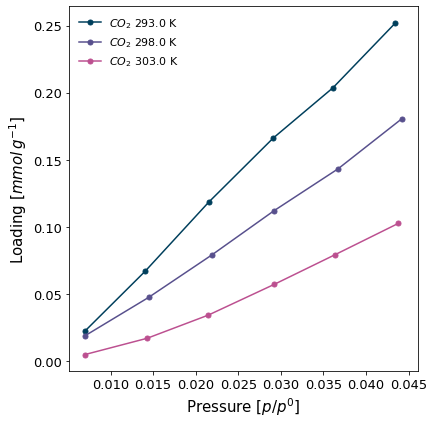

In [10]:
pgg.plot_iso(
    [IGA_WO2F4_293K,IGA_WO2F4_298K,IGA_WO2F4_303K],
    lgd_keys=['adsorbate', 'temperature'],
    logx=False,
)